# Mai Vu - Methods 4

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import *
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## 1. Read the data and split in into seperate training and testing sets

In [2]:
X = pd.read_csv('winequality-red.csv', sep = ';', index_col = None) #Read file, there are no missing attribute values

#WINE ALCOHOL CONTENT is chosen to be the predicted attribute.
train, test = model_selection.train_test_split(X, test_size = 0.33)
train_labels = train['alcohol'].copy()
train = train.drop('alcohol', axis = 1)
test_labels = test['alcohol'].copy()
test = test.drop('alcohol', axis = 1)

## 2. Data pre-modelling

In [3]:
print('Shape =', X.shape)
X.sample(10)

Shape = (1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
366,12.8,0.615,0.66,5.80,0.083,7.0,42.0,1.00220,3.07,0.73,10.0,7
917,6.8,0.410,0.31,8.80,0.084,26.0,45.0,0.99824,3.38,0.64,10.1,6
427,9.5,0.780,0.22,1.90,0.077,6.0,32.0,0.99880,3.26,0.56,10.6,6
560,12.7,0.600,0.49,2.80,0.075,5.0,19.0,0.99940,3.14,0.57,11.4,5
277,11.5,0.180,0.51,4.00,0.104,4.0,23.0,0.99960,3.28,0.97,10.1,6
775,7.2,1.000,0.00,3.00,0.102,7.0,16.0,0.99586,3.43,0.46,10.0,5
1098,8.0,0.310,0.45,2.10,0.216,5.0,16.0,0.99358,3.15,0.81,12.5,7
357,10.5,0.420,0.66,2.95,0.116,12.0,29.0,0.99700,3.24,0.75,11.7,7
1039,8.9,0.500,0.21,2.20,0.088,21.0,39.0,0.99692,3.33,0.83,11.1,6
1487,6.0,0.640,0.05,1.90,0.066,9.0,17.0,0.99496,3.52,0.78,10.6,5


There are 11 features and 1 predicted attribute and total 1599 samples.

In [4]:
X.describe().round(4)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.0000,1599.0000,1599.0000,1599.0000,1599.0000,1599.0000,1599.0000,1599.0000,1599.0000,1599.0000,1599.0000,1599.0000
mean,8.3196,0.5278,0.2710,2.5388,0.0875,15.8749,46.4678,0.9967,3.3111,0.6581,10.4230,5.6360
std,1.7411,0.1791,0.1948,1.4099,0.0471,10.4602,32.8953,0.0019,0.1544,0.1695,1.0657,0.8076
min,4.6000,0.1200,0.0000,0.9000,0.0120,1.0000,6.0000,0.9901,2.7400,0.3300,8.4000,3.0000
25%,7.1000,0.3900,0.0900,1.9000,0.0700,7.0000,22.0000,0.9956,3.2100,0.5500,9.5000,5.0000
50%,7.9000,0.5200,0.2600,2.2000,0.0790,14.0000,38.0000,0.9968,3.3100,0.6200,10.2000,6.0000
75%,9.2000,0.6400,0.4200,2.6000,0.0900,21.0000,62.0000,0.9978,3.4000,0.7300,11.1000,6.0000
max,15.9000,1.5800,1.0000,15.5000,0.6110,72.0000,289.0000,1.0037,4.0100,2.0000,14.9000,8.0000


The range of the predicted attribute is [8.4,14.9]. The ranges are different between attributes, so normalization or standardization are considered. 

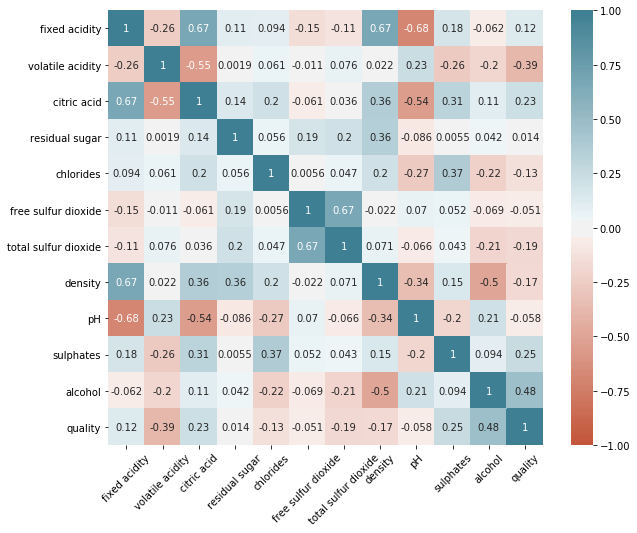

In [5]:
import seaborn as sns
plt.figure(figsize = (10,8))
corr = X.corr()
ax = sns.heatmap(
    corr, annot = True,
    vmin=-1, vmax=1, center= 0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45
);

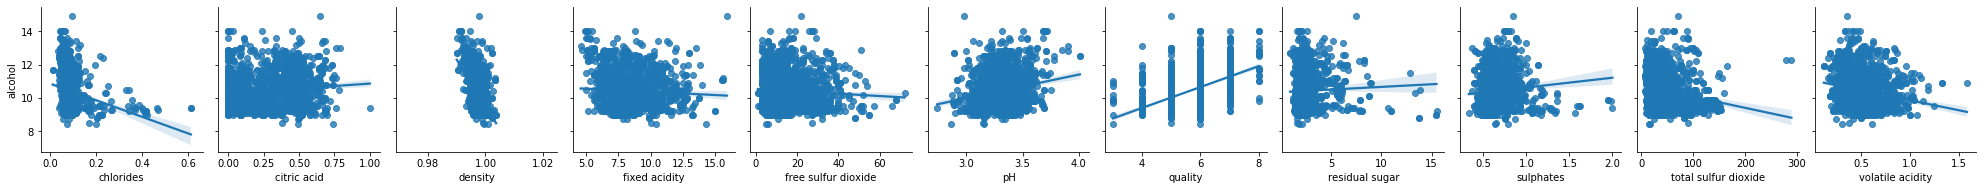

In [6]:
pp = sns.pairplot(X, kind = "reg", 
                  y_vars=['alcohol'],
                  x_vars=X.columns.difference(['alcohol']))
plt.show(pp)

From the correlation matrix and the pairplot, it seems that most related variables for the alcohol content are density and quality. Other features have no high correlation values. 

## 3. Find out what are 5 most useful variables for the wine alcohol content

The plan is to first, try LinearRegression from sklearn library for all features and print out the $MSE$ of the model. Then do the same thing but for 1-feature-missing datasets. From there, the 5 highest $MSE$ models are expected to show 5 most useful variables.<br>
(Standardization is considerated; but after trials, the $MSE$s do not changed much so no standarlization performance)

In [7]:
regression = LinearRegression().fit(train, train_labels)
MSE_train = mean_squared_error(regression.predict(train), train_labels)
MSE_test = mean_squared_error(regression.predict(test), test_labels)
print('MSE for the train set =', round(MSE_train, 5))
print('MSE for the test set =', round(MSE_test, 5))

MSE for the train set = 0.34046
MSE for the test set = 0.37628


In [8]:
MSE = []
#Calculate MSE for each 1-feature-missing datasets
for column in train:
    train_dropped = train.drop([column], axis=1)
    test_dropped = test.drop([column], axis=1)
    reg = LinearRegression().fit(train_dropped, train_labels)
    
    MSE.append([column, round(mean_squared_error(reg.predict(train_dropped), train_labels) - MSE_train, 5)])

print('Sorted:\n', sorted(MSE, key =lambda x : x[1] , reverse = True)) #Sort and print the result

Sorted:
 [['density', 0.41106], ['pH', 0.13616], ['fixed acidity', 0.12616], ['residual sugar', 0.10146], ['quality', 0.02777], ['sulphates', 0.01434], ['citric acid', 0.00995], ['volatile acidity', 0.00639], ['free sulfur dioxide', 0.00112], ['total sulfur dioxide', 0.00045], ['chlorides', 0.00037]]


From the output above, (because from the quality, the $MSE$s are not changed much) I would say 4 (not 5) most useful variables for the prediction are density, pH, fixed acidity and residual sugar. The density feature is predicted earlier. Some features have higher correlation values compared to others but no much different in $MSE$s and vice versa.<br>
Also, the $MSE$s differents are all positive, meaning there are no wasted attributes that can be dropped to reduce $MSE$. So the final model chosen for the next section is the first one with no column dropped.<br>

### 4. Regression equation and prediction error

In [9]:
print(regression.coef_)

[ 4.87715262e-01  6.00315569e-01  9.30393731e-01  2.58445255e-01
 -5.61505745e-01 -4.44682922e-03 -9.22711554e-04 -5.84401023e+02
  3.76440880e+00  8.46972467e-01  2.57426098e-01]


Above are coefficients for the linear regression problem. The regression equation is the sum of the product of the coefficients and the corresponded variables.

In [10]:
print('MSE for the train set =', round(MSE_train, 5))
print('MSE for the test set =', round(MSE_test, 5))

MSE for the train set = 0.34046
MSE for the test set = 0.37628


The MSEs for the train and the test sets are not too different; the model is not overfitting.